# Optional Lab - Neurons and Layers
In this lab we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models you have mastered in Course 1, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.

## Packages
**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

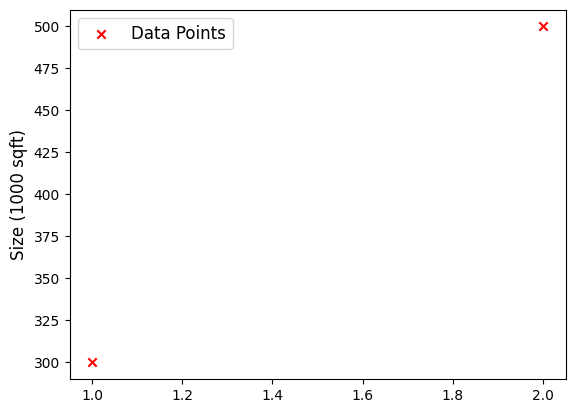

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)  # size in 1000 square ft
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)  # price in 1000s of dollars

fig, ax = plt.subplots()

# Create a scatter plot using X_train for the x-axis and Y_train for the y-axis
# Parameter 'c' represents color
# The label does not appear on the plot unless I set the font size of the legend
ax.scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax.legend(fontsize="large")
ax.set_ylabel("Price (1000s of dollars)", fontsize="large")
ax.set_ylabel("Size (1000 sqft)", fontsize="large")
plt.show()


### Regression/Linear Model 
The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$



We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [3]:
linear_layer = Dense(units=1, activation = 'linear', )
# We haven't added the weights yet; so, expect the following line to return an empty list.
linear_layer.get_weights()

[]

Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [5]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.81942]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.   
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [11]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.81942]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so let's set them to some known values.

In [13]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [14]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


They produce the same values!
Now, we can use our linear layer to make predictions on our training data.

In [16]:
prediction_tf = linear_layer(X_train)  # Prediction from TensorFlow
prediction_np = np.dot( X_train, set_w) + set_b  # Prediction from NumPy

In [23]:
type(prediction_tf)

tensorflow.python.framework.ops.EagerTensor

In [24]:
prediction_tf

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

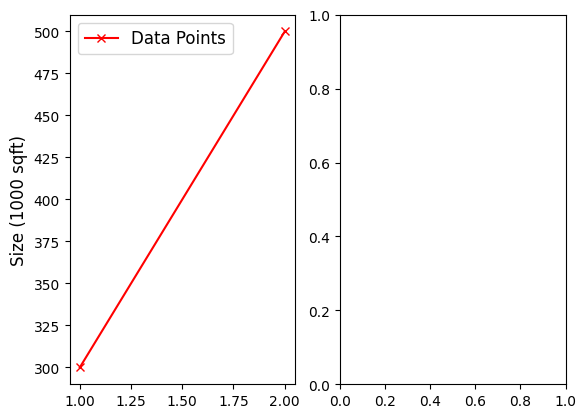

In [27]:

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(X_train, prediction_tf, marker="x", c="r", label="Data Points")
ax1.legend(fontsize="large")
ax1.set_ylabel("Price (1000s of dollars)", fontsize="large")
ax1.set_ylabel("Size (1000 sqft)", fontsize="large")


plt.show()
# plt_linear(X_train, Y_train, prediction_tf, prediction_np)

In [28]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c=dlc['dlblue'], label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[0].legend(fontsize='xx-large')
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c=dlc['dlblue'], label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[1].legend(fontsize='xx-large')
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()